# Atividade Aula 9

### Preparando o ambiente

In [ ]:
!pip install pandas numpy seaborn matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\guino\\OneDrive\\Documents\\Unesp\\datasets\\owid-energy-data.csv")

###  Limpando os dados

In [3]:
# Substituir NaN por zeros no dataframe
df = df.fillna(0)

### 1. Identificar os países da América do Sul no dataset
* Filtrar pelos países da américa do sul.
* Exibir um resumo estatístico do dataframe.

In [ ]:
# Descobrindo quais são as colunas do dataframe
colunas = list(df.columns)
for coluna in colunas:
    print(coluna)

In [ ]:
# Filtrando apenas pelos países da américa latina
latin_american_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
    "Cuba", "Ecuador", "El Salvador", "Guatemala", "Honduras", "Mexico",
    "Nicaragua", "Panama", "Paraguay", "Peru", "Dominican Republic",
    "Uruguay", "Venezuela"
]

filtered_df = df[df['country'].isin(latin_american_countries)]

filtered_df

In [ ]:
# Esse dataframe terá só as colunas desejadas
df_novo = filtered_df[
    [
        'country', 'year', 'fossil_electricity', 'gas_electricity', 'hydro_electricity',
        'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity',
        'renewables_electricity', 'solar_electricity'
    ]
]

df_novo


In [ ]:
# Resumos dos dados do novo dataframe

# Lista das colunas que queremos somar o consumo de energia
electricity_columns = [
    'fossil_electricity', 'gas_electricity', 'hydro_electricity',
    'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity',
    'renewables_electricity', 'solar_electricity'
]

# Somar os valores das colunas de eletricidade e agrupar por país
df_novo['total_electricity_consumption'] = df_novo[electricity_columns].sum(axis=1)

# Calcular o total de energia gasta por país
total_consumption_per_country = df_novo.groupby('country')['total_electricity_consumption'].sum().reset_index()

# Ordenando o total consumido em ordem decrescente
total_consumption_per_country = total_consumption_per_country.sort_values(by='total_electricity_consumption', ascending=False)

# Exibir o resultado
total_consumption_per_country


### 2. Análise por Tipo de Energia
* Criar um gráfico de linhas mostrando o consumo de energia ao longo dos anos para cada país da América do Sul.
* Identificar os países com o maior e menor consumo total de energia ao longo dos anos.

In [ ]:
# Plotando o gráfico de linhas

# Definir o ano inicial e o ano final
ano_inicial = 2000
ano_final = 2010

# Filtrar o dataframe para o intervalo de anos especificado
df_correto = df_novo[(df_novo['year'] >= ano_inicial) & (df_novo['year'] <= ano_final)]

# Somar as colunas de eletricidade por ano e por país
energy_columns = [
    'fossil_electricity', 'gas_electricity', 'hydro_electricity',
    'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity',
    'renewables_electricity', 'solar_electricity'
]

# Calcular a soma das colunas de eletricidade
energy_by_year_country = df_correto.groupby(['year', 'country'])[energy_columns].sum().sum(axis=1).reset_index(name='Energy Consumption')

# Plotar o gráfico com os dados agregados
plt.figure(figsize=(12, 6))  # Definir o tamanho do gráfico
sns.lineplot(data=energy_by_year_country, x='year', y='Energy Consumption', hue='country', marker='o')
plt.title('Consumo Anual de Energia por País')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')  # Posicionar a legenda fora do gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


In [ ]:
# Descobrindo país que mais gastou e que menos gastou
pais_mais_gasto = total_consumption_per_country.loc[total_consumption_per_country['total_electricity_consumption'].idxmax(), 'country']

pais_menos_gasto = total_consumption_per_country.loc[total_consumption_per_country['total_electricity_consumption'].idxmin(), 'country']

print(f"País que mais gastou energia: {pais_mais_gasto}")
print(f"País que menos gastou energia: {pais_menos_gasto}")


### 3. Comparação de Fontes de Energia Renováveis vs. Não Renováveis
* Comparar o uso de fontes de energia renováveis (hidrelétrica, solar, eólica) com o uso de fontes não renováveis (fóssil, gás natural) para cada país da América do Sul.
* Agrupar os dados por tipo de fonte de energia (renovável vs. não renovável).
* Calcular a média e o desvio padrão do consumo de cada tipo de energia por país.
* Criar um gráfico de barras que mostre a proporção de uso de energia renovável em comparação com a energia não renovável para cada país da América do Sul.

In [ ]:
# Vendo quanto foi gasto de cada fonte de energia (sustentável e não sustentável)

# Definir as colunas de energias sustentáveis e não sustentáveis
energia_sustentavel = [
    'hydro_electricity', 'solar_electricity',
    'other_renewable_electricity', 'renewables_electricity'
]

energia_nao_sustentavel = [
    'fossil_electricity', 'gas_electricity', 'oil_electricity',
    'nuclear_electricity'
]

# Calcular o total de energia sustentável e não sustentável
total_sustentavel = df_novo[energia_sustentavel].sum().sum()
total_nao_sustentavel = df_novo[energia_nao_sustentavel].sum().sum()

# Criar uma tabela para exibir os resultados
resultado = pd.DataFrame({
    'Tipo de Energia': ['Sustentável', 'Não Sustentável'],
    'Quantidade Gasta': [total_sustentavel, total_nao_sustentavel]
})

# Exibir a tabela
print(resultado)


In [ ]:
# Calculando média anual do uso de cada energia por país (exemplo só com o Brasil)

# Filtrar o dataframe para incluir apenas o Brasil e anos a partir de 2000
brasil_df = df_novo[(df_novo['country'] == 'Brazil') & (df_novo['year'] >= 2000)]

# Calcular a média do uso de energia hidrelétrica a partir de 2000
media_hidreletrica = brasil_df['hydro_electricity'].mean()

# Exibir o resultado
print(f"Média do uso de energia hidrelétrica no Brasil a partir de 2000: {media_hidreletrica}")



In [ ]:
# Calculando desvio padrão anual do uso de cada energia por país (exemplo só com o Brasil)

# Calcular o desvio padrão do uso de energia hidrelétrica a partir de 2000
desvio_padrao_hidreletrica = brasil_df['hydro_electricity'].std()

# Exibir o resultado
print(f"Desvio padrão do uso de energia hidrelétrica no Brasil a partir de 2000: {desvio_padrao_hidreletrica}")


In [ ]:
import matplotlib.pyplot as plt

# Calcular o total anual de energia sustentável e não sustentável
brasil_df['Sustentável'] = brasil_df[energia_sustentavel].sum(axis=1)
brasil_df['Não Sustentável'] = brasil_df[energia_nao_sustentavel].sum(axis=1)

# Agrupar por ano e calcular a soma total para cada tipo de energia
uso_anual = brasil_df.groupby('year')[['Sustentável', 'Não Sustentável']].sum().reset_index()

# Transformar para o formato adequado para o gráfico
uso_anual_melted = uso_anual.melt('year', var_name='Tipo de Energia', value_name='Consumo')

# Plotar o gráfico de barras
sns.barplot(data=uso_anual_melted, x='year', y='Consumo', hue='Tipo de Energia')

# Rotacionar os rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


### 4. Análise Temporal e Tendências
* Analisar o crescimento do consumo de energia e seus tipos no intervalo de 1960 (quando se teve mais dados) até 2020.
* 

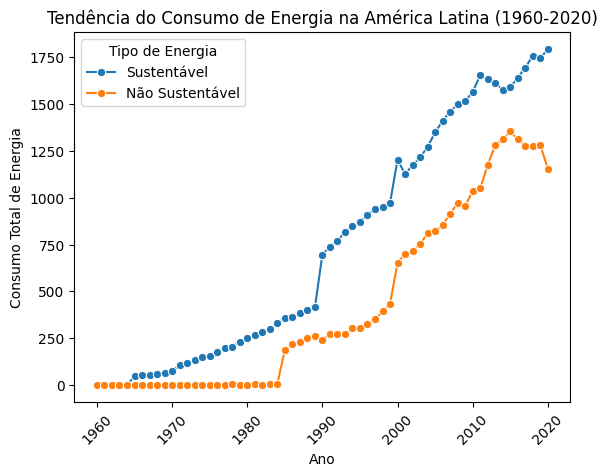

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas os países da América Latina
df_latam = df_novo[df_novo['country'].isin(latin_american_countries)]

# Filtrar o intervalo de anos entre 1960 e 2020
df_latam = df_latam[(df_latam['year'] >= 1960) & (df_latam['year'] <= 2020)]

# Calcular o consumo total de energia sustentável e não sustentável por ano
df_latam['Sustentável'] = df_latam[energia_sustentavel].sum(axis=1)
df_latam['Não Sustentável'] = df_latam[energia_nao_sustentavel].sum(axis=1)

# Agrupar por ano e calcular o total anual de energia para cada tipo
uso_anual = df_latam.groupby('year')[['Sustentável', 'Não Sustentável']].sum().reset_index()

# Converter para o formato longo para facilitar a plotagem com seaborn
uso_anual_melted = uso_anual.melt('year', var_name='Tipo de Energia', value_name='Consumo')

# Plotar o gráfico de linhas para mostrar a tendência
sns.lineplot(data=uso_anual_melted, x='year', y='Consumo', hue='Tipo de Energia', marker='o')
plt.title('Tendência do Consumo de Energia na América Latina (1960-2020)')
plt.xlabel('Ano')
plt.ylabel('Consumo Total de Energia')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Energia')
plt.show()


### 3. Gráficos e Visualizações
* Identificar e visualizar países que possuem valores extremos no consumo de energia (outliers).

In [21]:
# Filtrar e calcular o consumo total de energia para países da América Latina
outliers = (
    df_novo[df_novo['country'].isin(latin_american_countries)]
    .assign(Total_Energy=lambda x: x[energy_columns].sum(axis=1))
    .groupby('country')['Total_Energy']
    .sum()
)

# Calcular o IQR e limites para detectar outliers
Q1 = outliers.quantile(0.25)
Q3 = outliers.quantile(0.75)
IQR = Q3 - Q1

# Filtrar os outliers
outliers = outliers[(outliers < Q1 - 1.5 * IQR) | (outliers > Q3 + 1.5 * IQR)]

# Exibir os outliers
print("Países com consumo de energia considerado outlier:")
print(outliers)



Países com consumo de energia considerado outlier:
country
Brazil    31615.667
Mexico    17075.771
Name: Total_Energy, dtype: float64


# Conclusão da análise

Ao fim de toda essa análise podemos concluir que na América Latina o consumo de energia é majoritariamente proveniente de fontes sustentáveis. O crescimento do consumo de energia é presente tanto para as sustentáveis quanto para as não sustentáveis, e isso também está ligado ao crescimento das cidades com o passar dos anos. A análise poderia ter sido feita com mais precisão se o dataset contivesse mais informações não nulas, mas isso também se deve ao fato de não terem sido feitas coletas de dados em certos períodos para certos países, ou seja, só podemos ter uma dimensão real do cenário geral em períodos específicos (em que a quantidade e a qualidade dos dados sejam favoráveis).